# Welcome!

Follow the steps below for cheap and accurate transcription.
If you have any questions or comments, feel free to reach out.

Enjoy transcribing!


---

Want to learn more about the technical details?

*   [Whisper's getting started guide](https://platform.openai.com/docs/guides/speech-to-text)
*   [Whisper's API documentation](https://platform.openai.com/docs/api-reference/audio)

---

### 1. Drag your file into the files folder on the left
(click on the little folder icon to expand the files folder)

### 2. When the uploading is complete, click the 3 dots next to the file
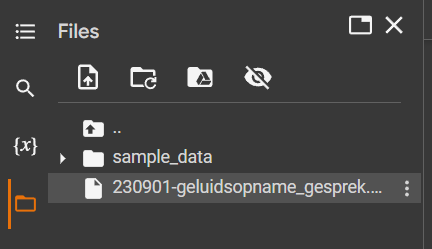

### 3. Click 'copy path'

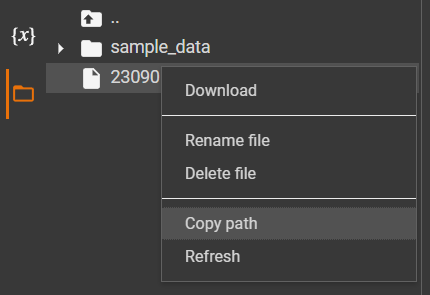

### 4a. Past the file path in the cell below between the ' ' behind "AUDIO_FILE_PATH".

### 4b. Paste your OpenAI API key in the cell below between the ' ' behind "OPENAI_API_KEY"

### 4c. Select the language you want your audio to be transcribed to.

In [13]:
OPENAI_API_KEY = "" # @param {type:"string"}
AUDIO_FILE_PATH = "" # @param {type:"string"}

LANGUAGE = "en" # @param ["en", "nl"]
MAX_WHISPER_AUDIO_SIZE = 26262828

In [12]:
PROMPT_nl = "Dit is een hersenspinsel van Bram. Hij denkt vaak na over zaken rondom Dembrane."
PROMPT_en = "This is a brainwave spoken by Bram. He often thinks about Dembrane and related business."

### 5. Run the transcription code! 🎙

Run all cells below by selecting them, and pressing 'shift' + 'enter'.

Make sure you run all cells in chronological order.

In [3]:
# Load the necessary OpenAI software

!pip install -q openai pydub

import openai
import os
import shutil
from pydub import AudioSegment
from pydub.utils import make_chunks

# For usage at home
from dotenv import load_dotenv
load_dotenv()
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI()

In [14]:
# Create transcription scripts

# Transcribe the audio file
def transcribe(AUDIO_FILE_PATH):
    with open(AUDIO_FILE_PATH, "rb") as audio_file:

        file_size = os.stat(AUDIO_FILE_PATH).st_size
        if file_size > MAX_WHISPER_AUDIO_SIZE - 8:
            print(f"Whisper file size limit exceeded. \n    > File size: {file_size}")
            print("Approximate running time: {}min".format(file_size//MAX_WHISPER_AUDIO_SIZE))
            n_chunks = create_chunks(AUDIO_FILE_PATH=AUDIO_FILE_PATH)
            transcript = ""
            print("Transcription started.")
            for i in range(n_chunks):
                with open('./temp_audio/chunk_{:03d}.mp3'.format(i+1), "rb") as audio_chunk:
                    transcript += whisper_call(audio_file=audio_chunk)
            try:
                shutil.rmtree('./temp_audio/')
            except:
                print("temp_audio could not be deleted")
        else:
            transcript = whisper_call(audio_file=audio_file)
        print("Transcription succes!")
    return transcript


# Deal with audio files that are larger then Whispers maximum file size
def create_chunks(AUDIO_FILE_PATH):
    # creates output folder
    try:
        os.makedirs('./temp_audio')
    except FileExistsError:
        pass

    # set constants
    chunk_length_ms = 15 * 60 * 1000
    audio_file = AudioSegment.from_mp3(AUDIO_FILE_PATH)
    chunks = make_chunks(audio_file, chunk_length_ms)

    # set export paramaters
    for i, chunk in enumerate(chunks, start = 1):
        chunk_name = './temp_audio/chunk_{:03d}.mp3'.format(i)
        print('    > exporting', os.path.basename(chunk_name))
        chunk.export(chunk_name, format='mp3')
    return len(chunks)


# Make the Whisper call
def whisper_call(audio_file):
    transcript = client.audio.transcriptions.create(
                                                    model="whisper-1", 
                                                    file=audio_file, 
                                                    response_format="text",
                                                    language=LANGUAGE,
                                                    prompt=PROMPT_en
)
    return transcript

In [15]:
# The actual transcription.
# Depending on the file size, the transcription process can take a while (roughly ~1min / 10min of audio)

print(f"Translating language: {LANGUAGE}")

transcript = transcribe(AUDIO_FILE_PATH)

with open(f"transcription-{LANGUAGE}.txt", "w") as file:
    file.write(transcript)

Translating language: en
Transcription succes!


### Ta da!

In the files folder on the left you can find your transcription.
Click on the three dots next to it to download your transcription.

In [ ]:
# Some statistics on the transcription